In [ ]:
# Supervised ML --> Regression --> Simple Linear Regression
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

In [ ]:
# STAGE 1 : Data Gathering / Load the Dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# STAGE 2 : EDA
data.shape

(9, 4)

In [ ]:
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [ ]:
# STAGE 3 : DATA PREPERATION
# a.) Check for missing and duplicate values
# b.) Convert non-numerical features into numerical features
# c.) Perform normalization
# d.) Select dependent and independent variable

In [ ]:
# a.) Check for missing and duplicate values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# b.) Convert non-numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [ ]:
data.Status = lb.fit_transform(data.Status)
data.Result = lb.fit_transform(data.Result)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  9 non-null      int64
 1   Test_Grade     9 non-null      int64
 2   Status         9 non-null      int64
 3   Result         9 non-null      int64
dtypes: int64(4)
memory usage: 420.0 bytes


In [ ]:
# c.) Perform normalization

In [ ]:
# d.) Select dependent and independent variable
# Independent variable - depends on user
# Dependent variable - depends on independent variables
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [ ]:
# Independent variable
x = data.Hours_Studied.values
x = x.reshape(9,1)
x.shape

(9, 1)

In [ ]:
# Dependent variable
y = data.Test_Grade.values
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# STAGE 4 : BUILDING A PREDICTIVE MODEL
# APPLY A SUITABLE ML ALGORITHM ON DATASET

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
lin_reg.fit(x,y)

LinearRegression()

In [ ]:
# STAGE 5 : EVALUATION OF MODEL
data['predictedValues'] = lin_reg.predict(x)

In [ ]:
data[['Hours_Studied' , 'Test_Grade'  ,'predictedValues']]

,Hours_Studied,Test_Grade,predictedValues
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
predvalue = lin_reg.predict(x)
print(predvalue)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


In [ ]:
# Regression score function
from sklearn.metrics import r2_score
acc = r2_score(y,predvalue)
print("Regression score function : ", acc)
print(f"Accuracy of model : {int(acc*100)}%")

Regression score function :  0.9757431074095347
Accuracy of model : 97%


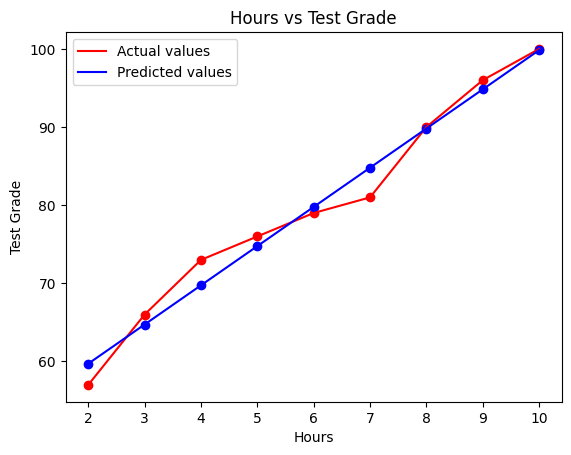

In [ ]:
# Plot actual values
plt.plot(x , y, color = 'red' , label = 'Actual values')
plt.scatter(x , y, color = 'red')

# Plot actual values
plt.plot(x , predvalue, color = 'blue' , label = 'Predicted values')
plt.scatter(x , predvalue, color = 'blue')

plt.title('Hours vs Test Grade')
plt.xlabel('Hours')
plt.ylabel('Test Grade')
plt.legend()
plt.show()

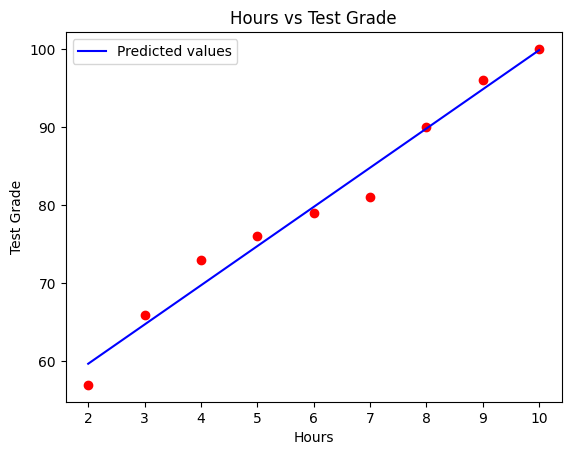

In [ ]:
# Plot actual values
plt.scatter(x , y, color = 'red')

# Plot actual values
plt.plot(x , predvalue, color = 'blue' , label = 'Predicted values')

plt.title('Hours vs Test Grade')
plt.xlabel('Hours')
plt.ylabel('Test Grade')
plt.legend()
plt.show()

In [ ]:
# STAGE 6 : FINAL PREDICTION

hrs = float(input("Enter the number of hours studied : "))
if hrs > 24:
  print("Invalid input")
elif hrs>=0 and hrs<=24:
  marks = lin_reg.predict([[hrs]])
  print("Predicted marks : ", int(marks[0]))

Enter the number of hours studied : 24
Predicted marks :  170
